<a href="https://colab.research.google.com/github/shrishatuladhar/AI-ML/blob/main/ShrishaTuladhar_Worksheet06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: SHRISHA TULADHAR**
**GROUP: L6CG7**
**WORKSHOP AND WORKSHEET 6 **

# WORKSHOP 6

## Feature Extraction

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [ ]:
img_height = 224 # Example image height
img_width = 224 # Example image width
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]


In [ ]:
train_dir = '/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/train'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset='training',
seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset='validation',
seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,416,074 (154.18 MB)

 Trainable params: 25,701,386 (98.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 18s/step - accuracy: 0.1997 - loss: 11.1095 - val_accuracy: 0.7222 - val_loss: 1.9998
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 23s/step - accuracy: 0.6376 - loss: 5.1507 - val_accuracy: 0.7778 - val_loss: 1.2263
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 52s 17s/step - accuracy: 0.6536 - loss: 2.8142 - val_accuracy: 0.7778 - val_loss: 1.4000
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.9171 - loss: 0.4508 - val_accuracy: 0.3889 - val_loss: 5.0895
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 18s/step - accuracy: 0.7266 - loss: 1.8423 - val_accuracy: 0.6111 - val_loss: 1.6031
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.9440 - loss: 0.2282 - val_accuracy: 0.8889 - val_loss: 0.5468
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 24s/step - accuracy: 1.0000 - loss: 7.0021e-05 - val_accuracy: 0.8889 - val_loss: 0.6472
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8889 - val_loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8889 - loss: 0.9517
Validation Accuracy: 0.89


In [ ]:
test_dir = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/test"  # Replace with your test data path

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    interpolation='nearest',
    seed=123
)


test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.3333 - loss: 6.4916
Test Accuracy: 0.3333
Test Loss: 6.4916


# FINE TUNING

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop

In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [ ]:
base_model.trainable = True

set_trainable = False

for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 19s/step - accuracy: 1.0000 - loss: 0.1932 - val_accuracy: 0.9444 - val_loss: 0.4074
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 25s/step - accuracy: 1.0000 - loss: 0.1389 - val_accuracy: 0.9444 - val_loss: 0.3270
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 19s/step - accuracy: 1.0000 - loss: 0.1134 - val_accuracy: 0.9444 - val_loss: 0.3810
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 24s/step - accuracy: 1.0000 - loss: 0.0897 - val_accuracy: 0.8889 - val_loss: 0.3924
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 20s/step - accuracy: 1.0000 - loss: 0.0712 - val_accuracy: 0.8889 - val_loss: 0.3062
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 24s/step - accuracy: 1.0000 - loss: 0.0585 - val_accuracy: 0.9444 - val_loss: 0.3065
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 18s/step - accuracy: 1.0000 - loss: 0.0460 - val_accuracy: 0.9444 - val_loss: 0.2759
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 1.0000 - loss: 0.0352 - val_accuracy: 0.9444 - val_loss: 0.3052


In [ ]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.9444 - loss: 0.2414
Validation Accuracy: 0.94


In [ ]:
test_dir = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/test"  # Replace with your test data path

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    interpolation='nearest',
    seed=123
)


test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.4667 - loss: 1.3467
Test Accuracy: 0.4667
Test Loss: 1.3467


# WORKSHEET 6

## Task 1: Complete Improved CNN Implementation

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, applications
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**SETUP AND DATA VERIFICATION**

In [ ]:
train_path = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/train"
test_path = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/test"
img_size = (128, 128)
batch_size = 16

def check_dataset(path):
    print(f"\nChecking dataset at {path}:")
    for class_name in sorted(os.listdir(path)):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
            print(f"{class_name}: {count} samples")

check_dataset(train_path)
check_dataset(test_path)


Checking dataset at /content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/train:
acai: 15 samples
cupuacu: 15 samples
graviola: 15 samples
guarana: 15 samples
pupunha: 15 samples
tucuma: 15 samples

Checking dataset at /content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/test:
acai: 5 samples
cupuacu: 5 samples
graviola: 5 samples
guarana: 5 samples
pupunha: 5 samples
tucuma: 5 samples


**ENHANCED DATA PIPELINE**

In [ ]:
def create_datasets():

    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=validation_split
    )

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        subset='training',
        seed=42
    )

    class_counts = train_generator.classes.shape[0]
    class_weights = {i: 1./count for i, count in enumerate(np.bincount(train_generator.classes))}


    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.8,1.2],
        validation_split=validation_split
    )

    train_ds = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        subset='training',
        seed=42
    )

    val_ds = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        subset='validation',
        seed=42
    )

    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_ds = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )

    return train_ds, val_ds, test_ds, class_weights

train_ds, val_ds, test_ds, class_weights = create_datasets()
class_names = list(train_ds.class_indices.keys())
num_classes = len(class_names)

Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


**MODEL ARCHITECTURE**

In [ ]:
def build_model():
    base_model = applications.MobileNetV2(
        input_shape=(img_size[0], img_size[1], 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(img_size[0], img_size[1], 3))
    x = inputs


    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomZoom(0.1)(x)
    x = layers.RandomContrast(0.1)(x)


    x = base_model(x, training=False)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = build_model()
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_15              │ (None, 128, 128, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_15 (RandomZoom)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_12              │ (None, 128, 128, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,238 (9.24 MB)

 Trainable params: 164,998 (644.52 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

**TRAINING**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1408 - loss: 0.2070 - val_accuracy: 0.2222 - val_loss: 2.1631 - learning_rate: 1.0000e-04
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.2105 - loss: 0.1788 - val_accuracy: 0.2222 - val_loss: 2.1914 - learning_rate: 1.0000e-04
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.2668 - loss: 0.1880 - val_accuracy: 0.2222 - val_loss: 2.0163 - learning_rate: 1.0000e-04
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.1669 - loss: 0.1951 - val_accuracy: 0.1111 - val_loss: 1.8812 - learning_rate: 1.0000e-04
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.2289 - loss: 0.1842 - val_accuracy: 0.2778 - val_loss: 1.8603 - learning_rate: 1.0000e-04
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.2134 - loss: 0.1906 - val_accuracy: 0.3333 - val_loss: 1.7015 - learning_rate: 1.0000e-04
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.1972 - 

**EVALUATION AND FINE TUNING**

In [ ]:
model.trainable = True
fine_tune_at = 100

for layer in model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_ds,
    epochs=50,
    initial_epoch=history.epoch[-1],
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)

**COMPREHENSIVE EVALUAITON**

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.7611 - loss: 0.7564

Test Accuracy: 0.7667
Test Loss: 0.7490
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.40      0.57         5
     cupuacu       0.83      1.00      0.91         5
    graviola       0.83      1.00      0.91         5
     guarana       0.67      0.80      0.73         5
     pupunha       0.67      0.80      0.73         5
      tucuma       0.75      0.60      0.67         5

    accuracy                           0.77        30
   macro avg       0.79      0.77      0.75        30
weighted avg       0.79      0.77      0.75        30



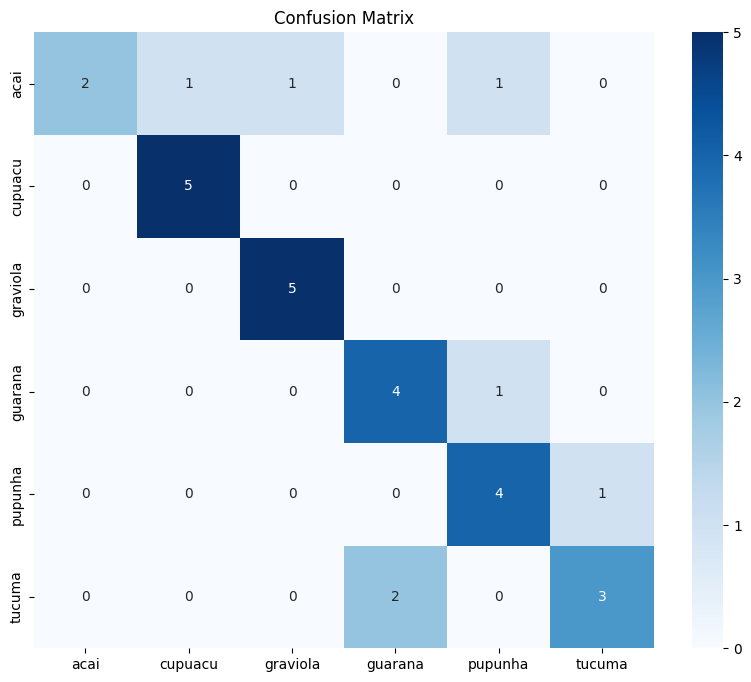

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


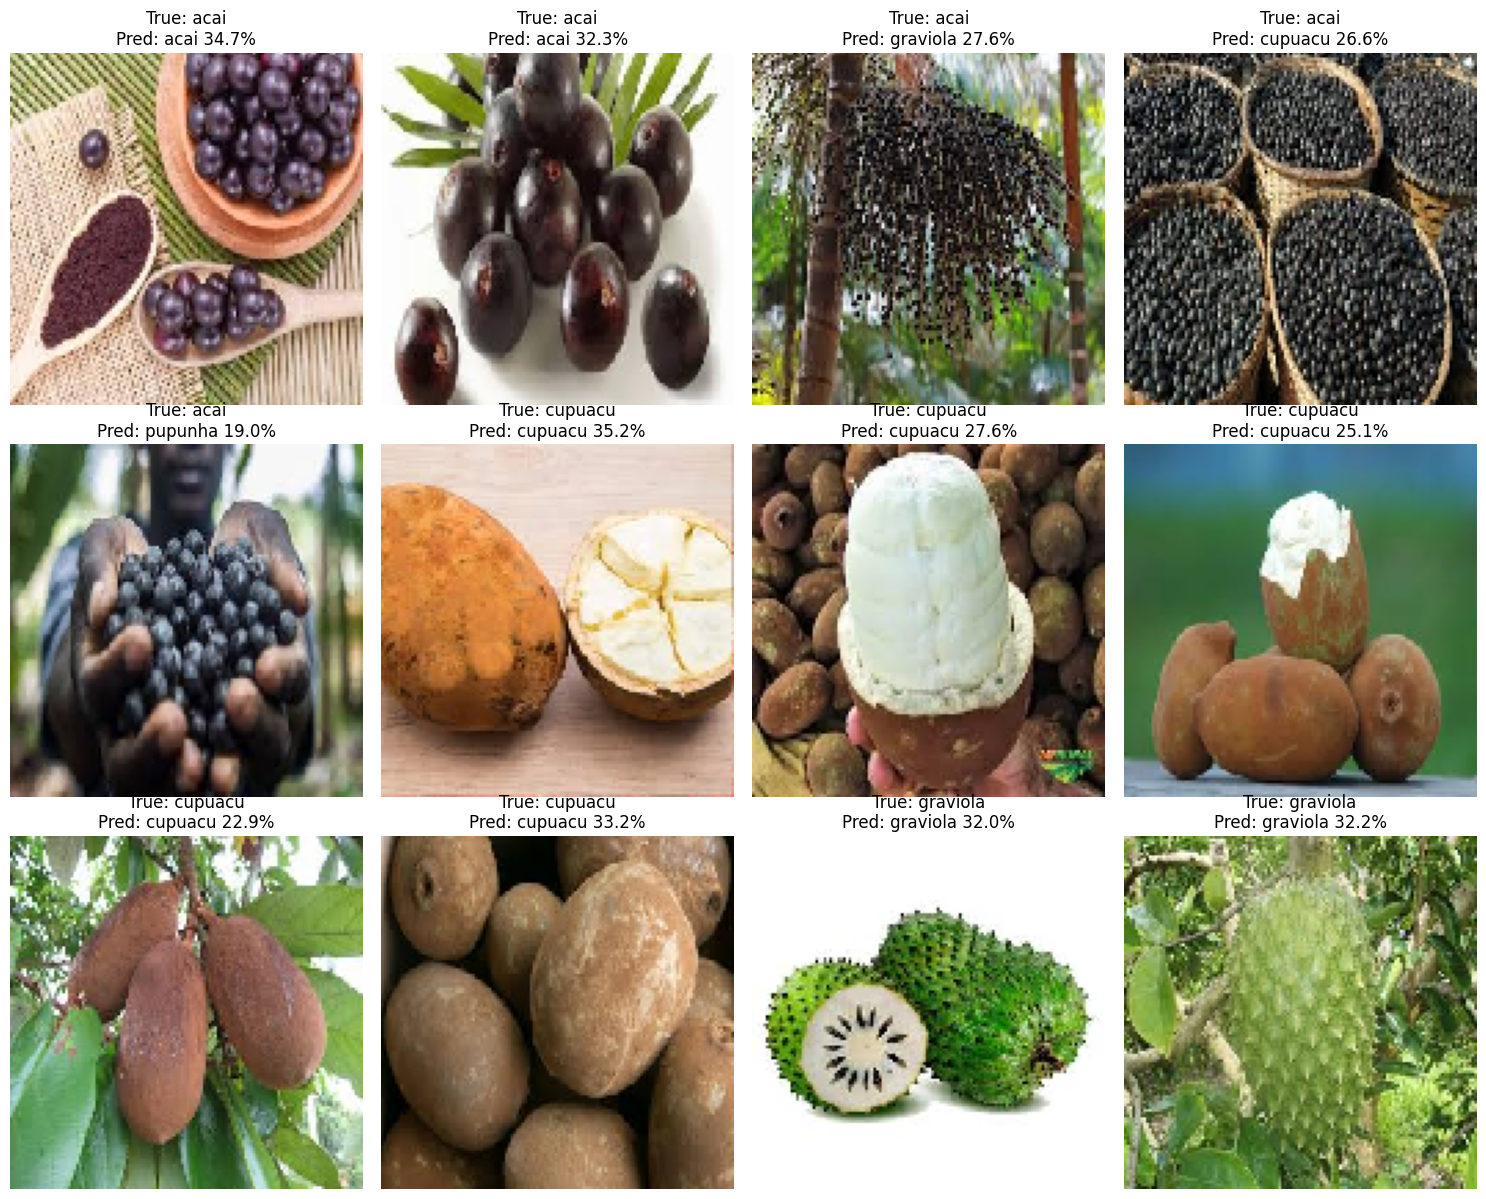

In [ ]:
def evaluate_model(model, test_ds):
    # Test evaluation
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"\nTest Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Predictions
    y_true = test_ds.labels
    y_pred = np.argmax(model.predict(test_ds), axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.show()

    # Sample predictions
    plt.figure(figsize=(15, 12))
    for i in range(min(12, len(test_ds.filepaths))):
        img = tf.keras.preprocessing.image.load_img(test_ds.filepaths[i], target_size=img_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) / 255.0

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        plt.subplot(3, 4, i+1)
        plt.imshow(img)
        plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[np.argmax(score)]} {100*np.max(score):.1f}%")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

evaluate_model(model, test_ds)

**SAVING MODEL**

In [ ]:
model.save("fruit_classifier_improved.h5")
print("Model saved successfully!")

Model saved successfully!


# **TASK 2**

## **TRANSFER LEARNING WITH PRE TRAINED MODEL**

**IMPORTS**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**DATA PREPARATION**

In [ ]:
train_path = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/train"
test_path = "/content/drive/MyDrive/Ai ML/Week5/FruitinAmazon/test"
img_size = (224, 224)
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


**TRANSFER LEARNING MODEL**

In [ ]:
def create_transfer_model():

    base_model = applications.MobileNetV2(
        input_shape=(img_size[0], img_size[1], 3),
        include_top=False,
        weights='imagenet'
    )

    # Freeze the base model
    base_model.trainable = False

    # Create new model on top
    inputs = tf.keras.Input(shape=(img_size[0], img_size[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

transfer_model = create_transfer_model()
transfer_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**TRAINING**

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = transfer_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1668 - loss: 2.1788 - val_accuracy: 0.2778 - val_loss: 1.7055
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4038 - loss: 1.4883 - val_accuracy: 0.3889 - val_loss: 1.3787
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5255 - loss: 1.3097 - val_accuracy: 0.6667 - val_loss: 1.1388
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7535 - loss: 0.8740 - val_accuracy: 0.7778 - val_loss: 0.9643
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7812 - loss: 0.8014 - val_accuracy: 0.7778 - val_loss: 0.8252
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8243 - loss: 0.7038 - val_accuracy: 1.0000 - val_loss: 0.7239
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9194 - loss: 0.5236 - val_accuracy: 1.0000 - val_loss: 0.6509
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9023 - loss: 0.4638 - val_accuracy: 1.0000 - val_loss: 0.5804
Epoch 9/30
3/3 

**EVALUATION**


Validation Set Evaluation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      1.00      1.00         3
     cupuacu       1.00      1.00      1.00         3
    graviola       1.00      1.00      1.00         3
     guarana       1.00      1.00      1.00         3
     pupunha       0.75      1.00      0.86         3
      tucuma       1.00      0.67      0.80         3

    accuracy                           0.94        18
   macro avg       0.96      0.94      0.94        18
weighted avg       0.96      0.94      0.94        18



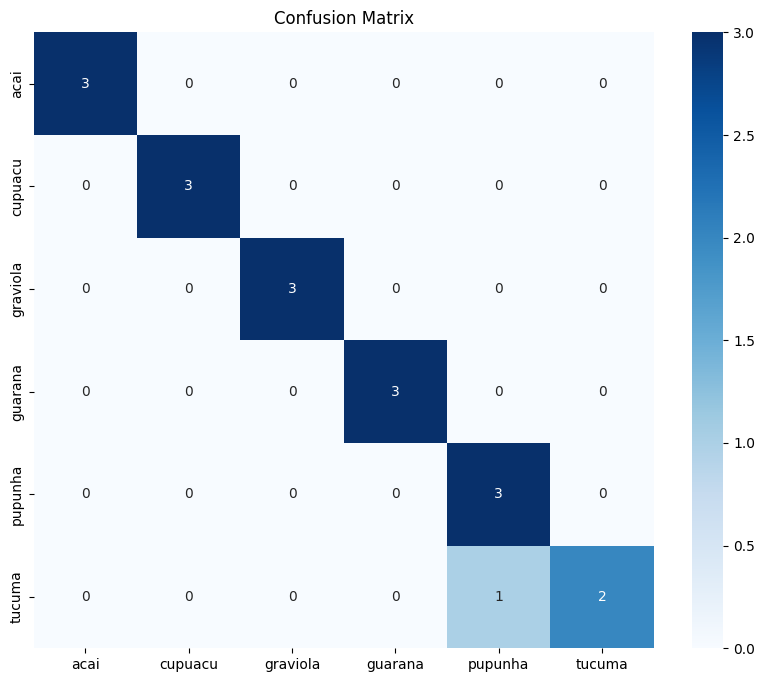


Test Set Evaluation:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.80      0.89         5
     cupuacu       1.00      1.00      1.00         5
    graviola       0.83      1.00      0.91         5
     guarana       1.00      1.00      1.00         5
     pupunha       0.83      1.00      0.91         5
      tucuma       1.00      0.80      0.89         5

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



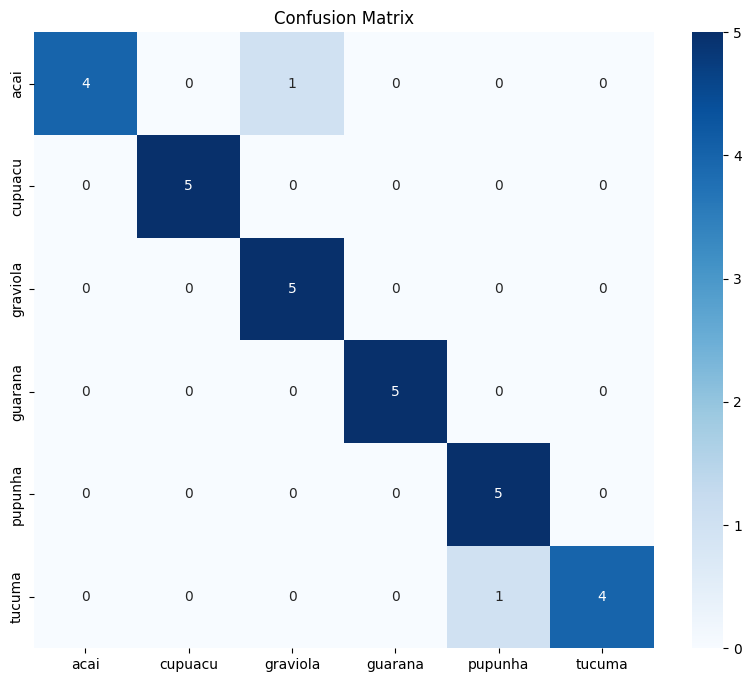

In [ ]:
def generate_classification_report(model, generator):
    # Get true labels
    y_true = generator.classes

    # Get predictions
    generator.reset()
    y_pred = np.argmax(model.predict(generator), axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.show()

    return y_pred

# Evaluate on validation set
print("\nValidation Set Evaluation:")
val_predictions = generate_classification_report(transfer_model, val_generator)

# Evaluate on test set
print("\nTest Set Evaluation:")
test_predictions = generate_classification_report(transfer_model, test_generator)

**COMPARISON WITH SCRATCH MODEL**

In [ ]:
scratch_val_accuracy = 0.9444
scratch_test_accuracy = 0.1000

transfer_val_accuracy = history.history['val_accuracy'][-1]
transfer_test_accuracy = transfer_model.evaluate(test_generator, verbose=0)[1]

print("\nPerformance Comparison:")
print(f"Scratch Model - Val Accuracy: {scratch_val_accuracy:.4f}, Test Accuracy: {scratch_test_accuracy:.4f}")
print(f"Transfer Model - Val Accuracy: {transfer_val_accuracy:.4f}, Test Accuracy: {transfer_test_accuracy:.4f}")
print(f"Improvement: {((transfer_test_accuracy - scratch_test_accuracy)/scratch_test_accuracy)*100:.2f}%")


Performance Comparison:
Scratch Model - Val Accuracy: 0.9444, Test Accuracy: 0.1000
Transfer Model - Val Accuracy: 0.9444, Test Accuracy: 0.9333
Improvement: 833.33%


**SAMPLE PREDICTIONS**


Sample Validation Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


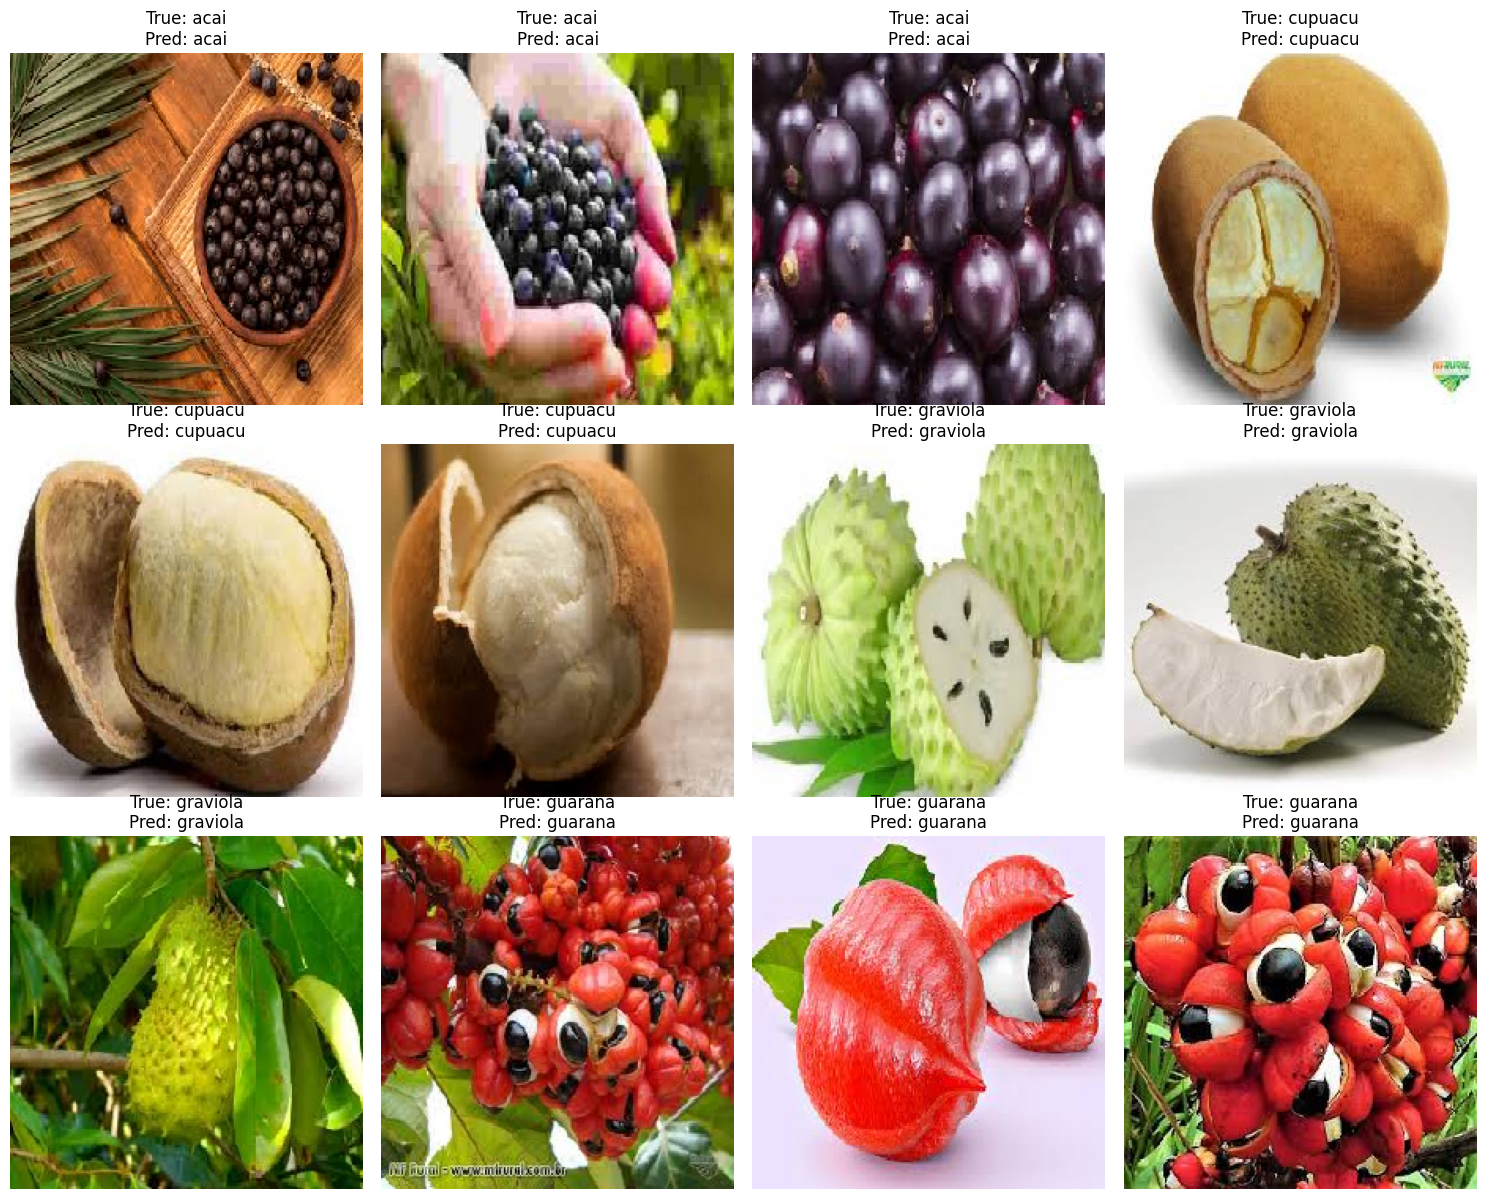

In [ ]:
def show_sample_predictions(generator, model, num_samples=12):
    plt.figure(figsize=(15, 12))
    generator.reset()
    images, labels = next(generator)

    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    for i in range(min(num_samples, len(images))):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[int(labels[i])]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

print("\nSample Validation Predictions:")
show_sample_predictions(val_generator, transfer_model)

**SAVE MODEL**

In [ ]:
transfer_model.save("fruit_classifier_transfer.h5")
print("\nModel saved successfully as 'fruit_classifier_transfer.h5'")


Model saved successfully as 'fruit_classifier_transfer.h5'
